# Principal Component Analysis

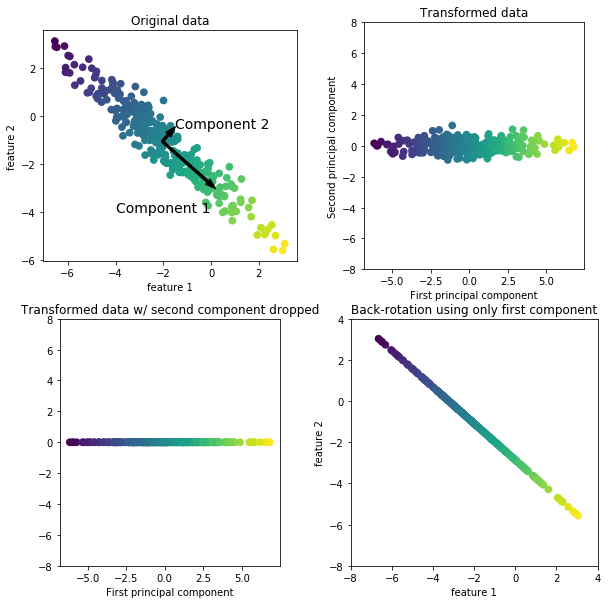

In [8]:
import mglearn

mglearn.plots.plot_pca_illustration()

In [9]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
print(cancer.keys())
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)

df_cancer

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
benign = df_cancer[cancer.target == 1]
malignant = df_cancer[cancer.target == 0]

各特徴量をヒストグラムで可視化すると、情報量が見える。

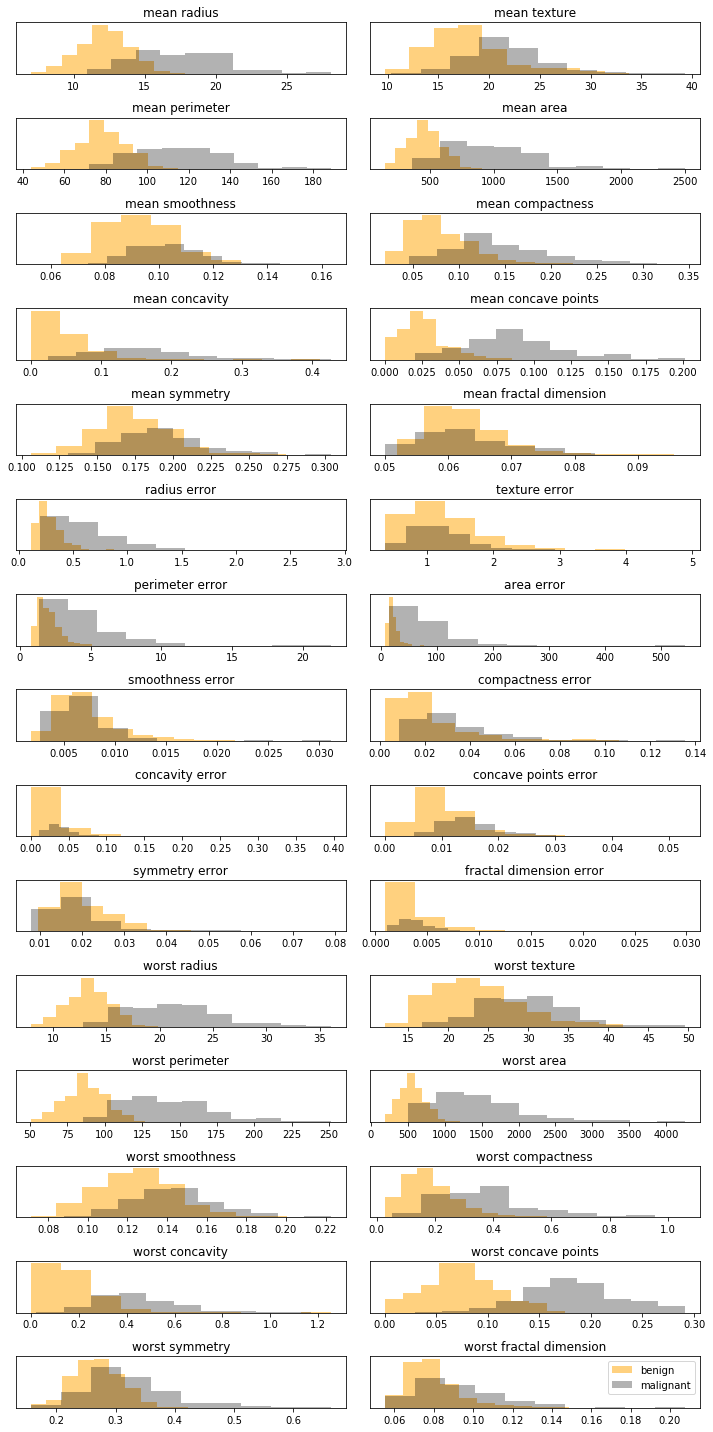

In [11]:
import matplotlib.pyplot as plt
import math
fig, axes = plt.subplots(math.ceil(cancer.feature_names.shape[0] / 2), 2, figsize=(10, 20))

ax = axes.ravel()

for i, f_name in enumerate(cancer.feature_names):
    ax[i].hist(benign[f_name], alpha=.5, color='orange')
    ax[i].hist(malignant[f_name], alpha=.3, color='black')
    ax[i].set_title(f_name)
    ax[i].set_yticks(())

plt.tight_layout()
plt.legend(['benign', 'malignant'], loc='best')
plt.show()

In [12]:
# 主成分分析の前にデータをスケーリングする
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [13]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

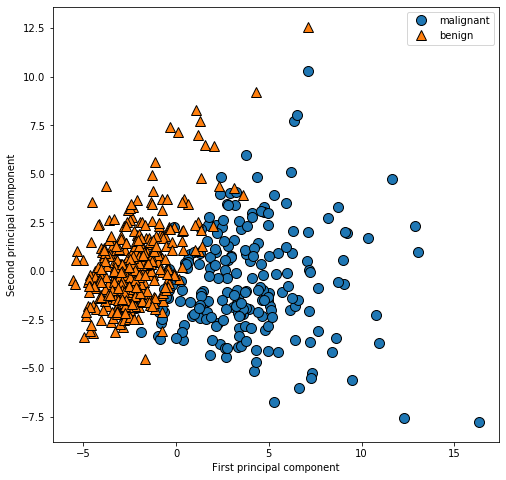

In [14]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
# plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [15]:

print('各成分は単位ベクトルであるので、大きさは1であるはず: ', np.sum((pca.components_[0])**2))
print('各成分は単位ベクトルであるので、大きさは1であるはず: ', np.sum((pca.components_[1])**2))

各成分は単位ベクトルであるので、大きさは1であるはず:  0.9999999999999993
各成分は単位ベクトルであるので、大きさは1であるはず:  0.9999999999999996


In [16]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

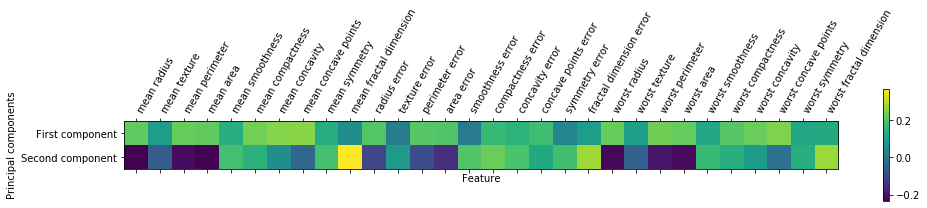

In [17]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

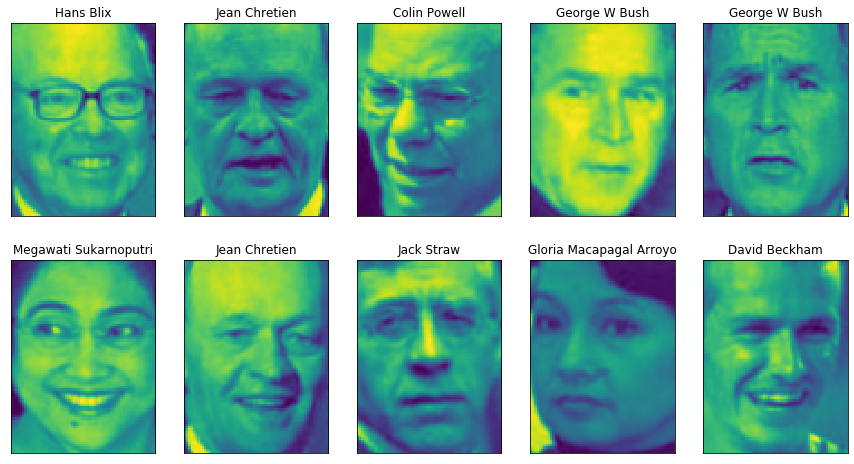

In [18]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape # 後で使う

fig, axes = plt.subplots(2, 5, figsize=(15, 8), 
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [19]:
print('what keys it has : {}'.format(people.keys()))
print('people.images.shape: {}'.format(people.images.shape)) # 87*65 picelsの写真が2769枚
print('what features it has: {}'.format(people.target_names))

what keys it has : dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
people.images.shape: (2769, 87, 65)
what features it has: ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Ariel Sharon' 'Arnold Schwarzenegger' 'Atal Bihari Vajpayee'
 'Bill Clinton' 'Carlos Menem' 'Colin Powell' 'David Beckham'
 'Donald Rumsfeld' 'George Robertson' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Gray Davis' 'Hamid Karzai' 'Hans Blix'
 'Hugo Chavez' 'Igor Ivanov' 'Jack Straw' 'Jacques Chirac' 'Jean Chretien'
 'Jennifer Aniston' 'Jennifer Capriati' 'Jennifer Lopez'
 'Jeremy Greenstock' 'Jiang Zemin' 'John Ashcroft' 'John Negroponte'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts' 'Pete Sampras'
 'Ricardo Lagos' 'Rudolph Giuliani' 'Saddam Hussein' 'Serena Williams'
 'Tiger Woods' 'Tom Daschle' 'Tom Ridge' 'T

In [20]:
import pandas as pd

df = pd.DataFrame(people.data)

df

,0,1,2,3,4,5,6,7,8,9,...,5645,5646,5647,5648,5649,5650,5651,5652,5653,5654
0,176.666672,182.666672,182.333328,181.000000,182.666672,190.333328,197.333328,199.333328,200.666672,202.000000,...,105.000000,112.333336,119.000000,120.666664,119.333336,120.666664,121.333336,119.666664,119.333336,121.000000
1,65.333336,112.333336,160.333328,176.000000,188.666672,205.000000,222.666672,227.000000,217.666672,209.666672,...,243.333328,243.333328,246.666672,248.000000,246.333328,160.000000,42.000000,22.666666,34.666668,40.000000
2,148.000000,144.000000,142.333328,142.333328,140.333328,139.666672,144.666672,162.000000,184.333328,198.000000,...,167.333328,173.666672,177.666672,181.666672,185.666672,186.666672,187.333328,185.666672,183.666672,188.000000
3,92.333336,97.000000,103.333336,111.000000,116.666664,123.333336,134.333328,146.666672,156.000000,160.000000,...,50.666668,55.333332,58.666668,64.666664,69.000000,73.000000,75.333336,77.666664,80.333336,83.666664
4,85.666664,76.666664,52.333332,35.333332,64.666664,113.333336,123.000000,124.666664,124.333336,128.666672,...,121.333336,131.000000,133.333328,126.000000,113.666664,91.333336,104.000000,181.333328,231.333328,238.333328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,98.000000,59.666668,65.333336,79.666664,90.666664,101.666664,112.666664,125.666664,133.666672,141.000000,...,156.666672,149.666672,143.666672,134.333328,131.000000,136.333328,145.333328,157.333328,165.333328,168.666672
2765,90.000000,76.666664,72.333336,80.333336,107.000000,136.000000,138.666672,134.666672,138.333328,144.000000,...,218.000000,238.666672,237.000000,239.333328,239.000000,233.333328,231.000000,221.000000,159.000000,47.333332
2766,75.333336,69.000000,69.333336,78.000000,87.666664,88.000000,92.333336,97.666664,99.000000,101.666664,...,229.333328,228.666672,227.666672,228.333328,224.666672,209.666672,199.000000,196.000000,194.333328,165.666672
2767,45.000000,51.333332,53.333332,53.000000,64.666664,90.666664,124.666664,144.333328,148.666672,150.333328,...,218.666672,232.333328,232.333328,232.000000,232.000000,230.333328,234.666672,231.666672,182.000000,106.333336


In [21]:
# どの人が何回出てくるか数える
# ラベルが数字のままなので失敗

count_dict = {}

for name in people.target:
    if name not in count_dict:
        count_dict[name] = 1
    else:
        count_dict[name] += 1

count_dict

{18: 39,
 23: 55,
 9: 236,
 13: 530,
 38: 33,
 21: 28,
 15: 44,
 10: 31,
 32: 60,
 45: 52,
 35: 22,
 49: 144,
 24: 21,
 48: 33,
 31: 28,
 11: 121,
 5: 42,
 4: 77,
 43: 26,
 14: 109,
 39: 20,
 30: 31,
 34: 41,
 44: 23,
 26: 21,
 12: 22,
 22: 52,
 0: 39,
 1: 35,
 27: 24,
 29: 53,
 20: 20,
 50: 32,
 25: 42,
 19: 71,
 36: 41,
 17: 22,
 42: 27,
 7: 29,
 8: 21,
 52: 24,
 41: 22,
 46: 23,
 2: 21,
 16: 26,
 28: 20,
 40: 22,
 47: 25,
 37: 48,
 51: 49,
 3: 36,
 6: 24,
 33: 32}

[numpy.bincount](https://www.geeksforgeeks.org/numpy-bincount-python/)

In [22]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Ariel Sharon               77   Arnold Schwarzenegger      42   
Atal Bihari Vajpayee       24   Bill Clinton               29   Carlos Menem               21   
Colin Powell              236   David Beckham              31   Donald Rumsfeld           121   
George Robertson           22   George W Bush             530   Gerhard Schroeder         109   
Gloria Macapagal Arroyo    44   Gray Davis                 26   Hamid Karzai               22   
Hans Blix                  39   Hugo Chavez                71   Igor Ivanov                20   
Jack Straw                 28   Jacques Chirac             52   Jean Chretien              55   
Jennifer Aniston           21   Jennifer Capriati          42   Jennifer Lopez             21   
Jeremy Greenstock          24   Jiang Zemin                20   John Ashcroft              53   
John Negroponte            31 

[np.where](https://thispointer.com/numpy-where-tutorial-examples-python/)

In [23]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

In [24]:
a = np.array([[0, 1, 2],
              [0, 2, 4],
              [0, 3, 6]])
np.where(a < 4, a, -1)

array([[ 0,  1,  2],
       [ 0,  2, -1],
       [ 0,  3, -1]])

In [25]:
a = np.array([[0, 1, 2],
              [0, 2, 4],
              [0, 3, 6]])
np.where(a < 4)

# 出力は縦で見る
# (0, 0), (0, 1), (0, 2), ...

(array([0, 0, 0, 1, 1, 2, 2], dtype=int64),
 array([0, 1, 2, 0, 1, 0, 1], dtype=int64))

In [26]:
import numpy as np
a = np.array([0, 1, 2, 1, 1, 1])
np.where(a == 1)

(array([1, 3, 4, 5], dtype=int64),)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.27


In [33]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))
print("X_test_pca.shape: {}".format(X_test_pca.shape))
X_test.shape

X_train_pca.shape: (1356, 100)
X_test_pca.shape: (453, 100)


(453, 5655)

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.35


In [30]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


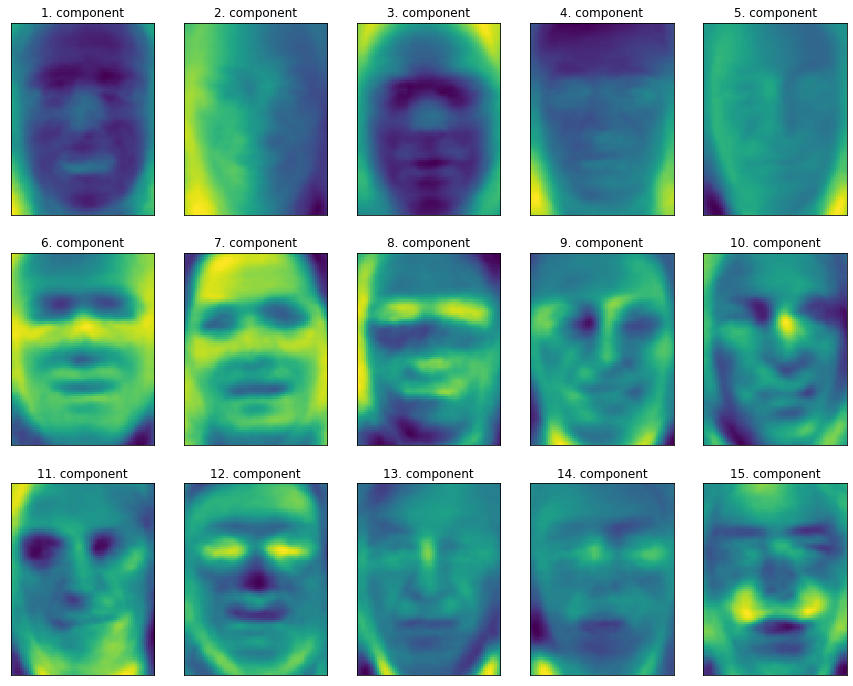

In [31]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

(87, 65)